# Application: Heterogeneous Effect of Gender on Wage Using Double Lasso

 We use US census data from the year 2012 to analyse the effect of gender and interaction effects of other variables with gender on wage jointly. The dependent variable is the logarithm of the wage, the target variable is *female* (in combination with other variables). All other variables denote some other socio-economic characteristics, e.g. marital status, education, and experience.  For a detailed description of the variables we refer to the help page.



This analysis allows a closer look how discrimination according to gender is related to other socio-economic variables.



In [1]:
library(hdm)
data(cps2012)
str(cps2012)

'data.frame':	29217 obs. of  23 variables:
 $ year        : num  2012 2012 2012 2012 2012 ...
 $ lnw         : num  1.91 1.37 2.54 1.8 3.35 ...
 $ female      : num  1 1 0 1 0 0 0 0 0 1 ...
 $ widowed     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ divorced    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ separated   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nevermarried: num  0 0 0 0 0 0 1 0 0 0 ...
 $ hsd08       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsd911      : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hsg         : num  0 0 1 1 0 1 1 0 0 0 ...
 $ cg          : num  0 0 0 0 1 0 0 0 1 0 ...
 $ ad          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mw          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ exp1        : num  22 30 19 14 15 23 33 23.5 15 15.5 ...
 $ exp2        : num  4.84 9 3.61 1.96 2.25 ...
 $ exp3        : num  10.65 27 6.86 2.74 3.38 ...
 $ exp4        : num  23.43 81 13.03 3.84 5.06 ...
 $ weight      : num  569 626 264 257 257 ...
 $ 

In [2]:
# create the model matrix for the covariates
X <- model.matrix(~-1 + female + female:(widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + +(widowed +
divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +
we + exp1 + exp2 + exp3)^2, data = cps2012)
X <- X[, which(apply(X, 2, var) != 0)] # exclude all constant variables
demean<- function (x){ x- mean(x)}
X<- apply(X, 2, FUN=demean)
dim(X)

# target variables, index.gender specifices coefficients we are interested in
index.gender <- grep("female", colnames(X))
y <- cps2012$lnw

[1] 29217   116

The parameter estimates for the target parameters, i.e. all coefficients related to gender (i.e. by interaction with other variables) are calculated and summarized by the following commands:



In [3]:
# this cell takes a minute to run

effects.female <- rlassoEffects(x = X, y = y, index = index.gender)


In [4]:
result=summary(effects.female)
result$coef
library(xtable)
print(xtable(result$coef[,c(1,2,4)], type="latex"), digits=3)


,Estimate.,Std. Error,t value,Pr(>|t|)
female,-0.154923281,0.050162447,-3.08843149,2.012161e-03
female:widowed,0.136095484,0.090662629,1.50111997,1.333245e-01
female:divorced,0.136939386,0.022181700,6.17352970,6.678200e-10
female:separated,0.023302763,0.053211795,0.43792476,6.614408e-01
female:nevermarried,0.186853483,0.019942393,9.36966209,7.276511e-21
female:hsd08,0.027810312,0.120914496,0.22999982,8.180919e-01
female:hsd911,-0.119335040,0.051879684,-2.30022682,2.143537e-02
female:hsg,-0.012889780,0.019223188,-0.67053290,5.025181e-01
female:cg,0.010138553,0.018326505,0.55321800,5.801141e-01
female:ad,-0.030463745,0.021806103,-1.39702838,1.624050e-01


% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Sun Feb 28 17:18:47 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & Estimate. & Std. Error & Pr($>$$|$t$|$) \\ 
  \hline
female & -0.15 & 0.05 & 0.00 \\ 
  female:widowed & 0.14 & 0.09 & 0.13 \\ 
  female:divorced & 0.14 & 0.02 & 0.00 \\ 
  female:separated & 0.02 & 0.05 & 0.66 \\ 
  female:nevermarried & 0.19 & 0.02 & 0.00 \\ 
  female:hsd08 & 0.03 & 0.12 & 0.82 \\ 
  female:hsd911 & -0.12 & 0.05 & 0.02 \\ 
  female:hsg & -0.01 & 0.02 & 0.50 \\ 
  female:cg & 0.01 & 0.02 & 0.58 \\ 
  female:ad & -0.03 & 0.02 & 0.16 \\ 
  female:mw & -0.00 & 0.02 & 0.96 \\ 
  female:so & -0.01 & 0.02 & 0.67 \\ 
  female:we & -0.00 & 0.02 & 0.84 \\ 
  female:exp1 & 0.00 & 0.01 & 0.53 \\ 
  female:exp2 & -0.16 & 0.05 & 0.00 \\ 
  female:exp3 & 0.04 & 0.01 & 0.00 \\ 
   \hline
\end{tabular}
\end{table}


Now, we estimate and plot confident intervals, first "pointwise" and then the joint confidence intervals.

,5 %,95 %
female,-0.237433164,-0.072413398
female:widowed,-0.013031271,0.285222239
female:divorced,0.100453736,0.173425037
female:separated,-0.064222851,0.110828376
female:nevermarried,0.154051166,0.219655800
female:hsd08,-0.171076335,0.226696960
female:hsd911,-0.204669525,-0.034000554
female:hsg,-0.044509111,0.018729551
female:cg,-0.020005866,0.040282971
female:ad,-0.066331593,0.005404103


Warning message:
“Ignoring unknown aesthetics: width, h”


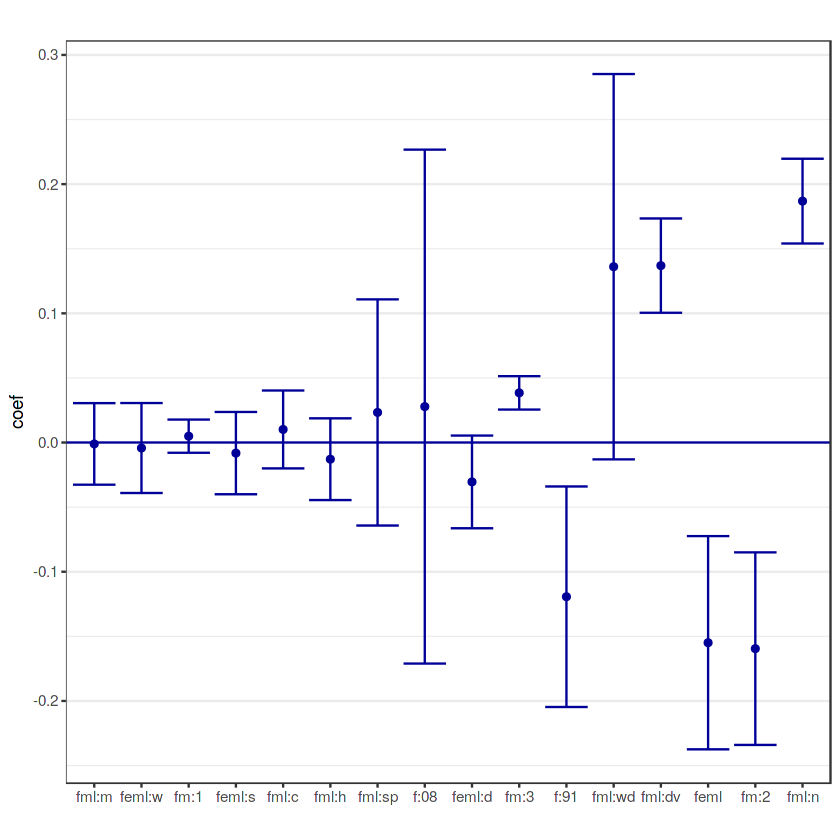

In [5]:
pointwise.CI <- confint(effects.female, level = 0.90)
pointwise.CI
plot(effects.female, level=0.90) # plot of the effects



Finally, we compare the pointwise confidence intervals to joint confidence intervals.

,5 %,95 %
female,-0.28562536,-0.02422120
female:widowed,-0.11701827,0.38920924
female:divorced,0.07863305,0.19524573
female:separated,-0.10807314,0.15467866
female:nevermarried,0.13281324,0.24089372
female:hsd08,-0.34966723,0.40528786
female:hsd911,-0.25978441,0.02111433
female:hsg,-0.06191408,0.03613452
female:cg,-0.03848285,0.05875995
female:ad,-0.09180140,0.03087391


Warning message:
“Ignoring unknown aesthetics: width, h”


% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Sun Feb 28 17:18:49 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & 5 \% & 95 \% \\ 
  \hline
female & -0.29 & -0.02 \\ 
  female:widowed & -0.12 & 0.39 \\ 
  female:divorced & 0.08 & 0.20 \\ 
  female:separated & -0.11 & 0.15 \\ 
  female:nevermarried & 0.13 & 0.24 \\ 
  female:hsd08 & -0.35 & 0.41 \\ 
  female:hsd911 & -0.26 & 0.02 \\ 
  female:hsg & -0.06 & 0.04 \\ 
  female:cg & -0.04 & 0.06 \\ 
  female:ad & -0.09 & 0.03 \\ 
  female:mw & -0.05 & 0.05 \\ 
  female:so & -0.06 & 0.04 \\ 
  female:we & -0.06 & 0.05 \\ 
  female:exp1 & -0.02 & 0.03 \\ 
  female:exp2 & -0.28 & -0.04 \\ 
  female:exp3 & 0.02 & 0.06 \\ 
   \hline
\end{tabular}
\end{table}


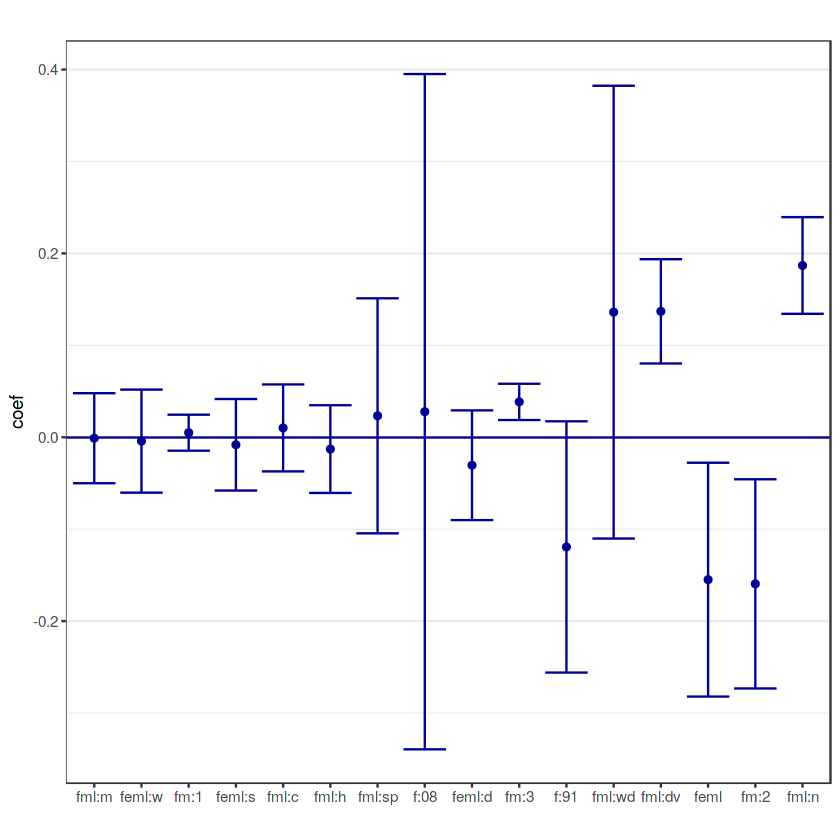

In [6]:
joint.CI <- confint(effects.female, level = 0.90, joint = TRUE)
joint.CI
plot(effects.female, joint=TRUE, level=0.90) # plot of the effects
print(xtable(joint.CI), type="latex")

# the plot output does not look great